In [1]:
import zipfile

DATA_IN_PATH = './data_in/'

file_list = ['train.csv.zip', 'test.csv.zip', 'sample_submission.csv.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_data = pd.read_csv(DATA_IN_PATH + 'train.csv')
train_data.head()

print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

print('전체 학습데이터의 개수: {}'.format(len(train_data)))

train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
train_set.head()

print('교육 데이터의 총 질문 수: {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 질문의 수: {}'.format(np.sum(train_set.value_counts() > 1)))

파일 크기 : 
test.csv                      477.59MB
train.csv                     63.4MB
sample_submission.csv         22.35MB
전체 학습데이터의 개수: 404290
교육 데이터의 총 질문 수: 537361
반복해서 나타나는 질문의 수: 111873


Text(0, 0.5, '# of questions')

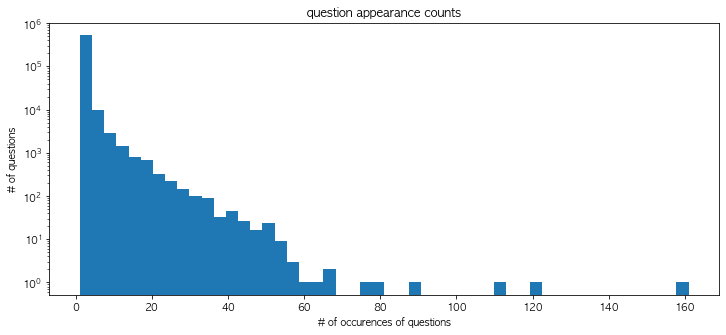

In [2]:
plt.figure(figsize=(12, 5))
plt.hist(train_set.value_counts(), bins=50)
plt.yscale('log')
plt.title('question appearance counts')
plt.xlabel('# of occurences of questions')
plt.ylabel('# of questions')

In [3]:
print('중복 최대 개수: %d' % np.max(train_set.value_counts()))
print('중복 최소 개수: %d' % np.min(train_set.value_counts()))
print('평균: %f' % np.mean(train_set.value_counts()))
print('표준편차: %f' % np.std(train_set.value_counts()))
print('중간값: %d' % np.median(train_set.value_counts()))
print('1사분면: %f' % np.percentile(train_set.value_counts(), 25))
print('3사분면: %f' % np.percentile(train_set.value_counts(), 75))

중복 최대 개수: 161
중복 최소 개수: 1
평균: 1.504724
표준편차: 1.911437
중간값: 1
1사분면: 1.000000
3사분면: 1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1286a48d0>,
 'caps': [<matplotlib.lines.Line2D at 0x128956bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x128962bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1289856d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x128985c10>],
 'means': []}

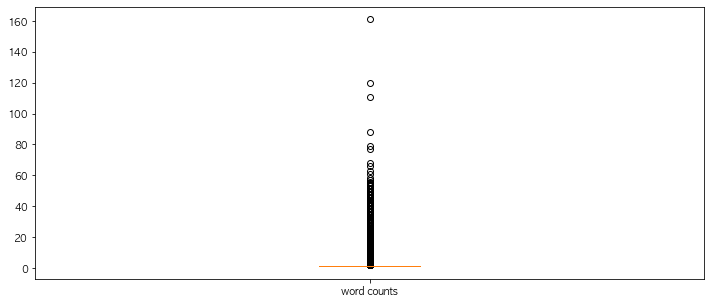

In [4]:
plt.figure(figsize=(12, 5))
plt.boxplot([train_set.value_counts()], labels=['word counts'])

(-0.5, 799.5, 599.5, -0.5)

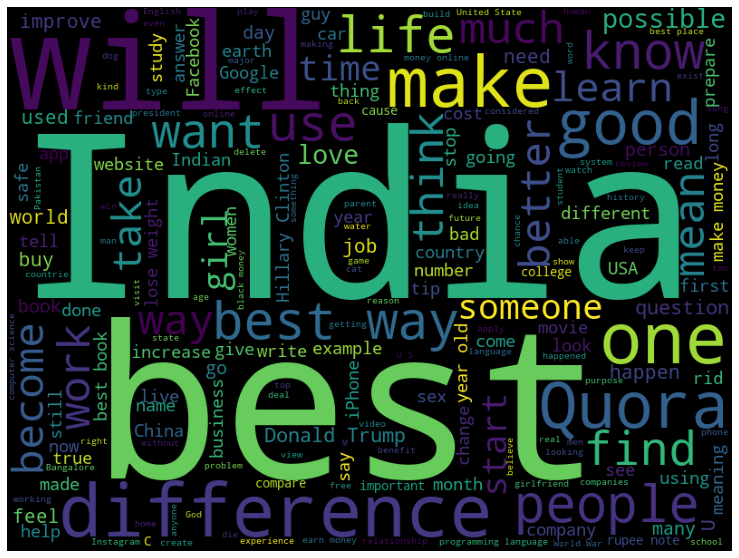

In [5]:
from wordcloud import WordCloud as wc
cloud = wc(width=800, height=600).generate(" ".join(train_set.astype('str')))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

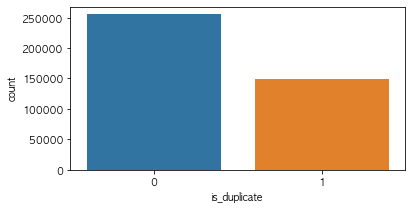

In [6]:
fig, axe = plt.subplots()
fig.set_size_inches(6, 3)
sns.countplot(train_data['is_duplicate'])

In [7]:
# character 단위로 먼저 분석
train_length = train_set.apply(len)

Text(0, 0.5, 'probalility')

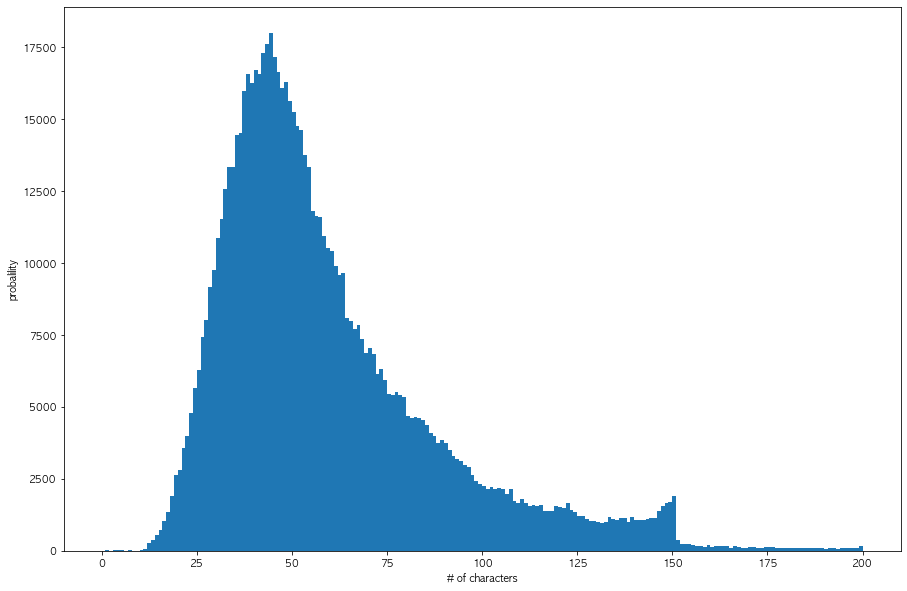

In [8]:
plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0, 200], label=['train'])
plt.xlabel('# of characters')
plt.ylabel('probalility')

In [9]:
print('중복 최대 개수: %d' % np.max(train_length))
print('중복 최소 개수: %d' % np.min(train_length))
print('평균: %f' % np.mean(train_length))
print('표준편차: %f' % np.std(train_length))
print('중간값: %d' % np.median(train_length))
print('1사분면: %f' % np.percentile(train_length, 25))
print('3사분면: %f' % np.percentile(train_length, 75))

중복 최대 개수: 1169
중복 최소 개수: 1
평균: 59.822548
표준편차: 31.963732
중간값: 51
1사분면: 39.000000
3사분면: 72.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x12896b550>,
 'caps': [<matplotlib.lines.Line2D at 0x16d5d5a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x16d5d6b10>],
 'medians': [<matplotlib.lines.Line2D at 0x16d5f6790>],
 'fliers': [<matplotlib.lines.Line2D at 0x16d5f6cd0>],
 'means': []}

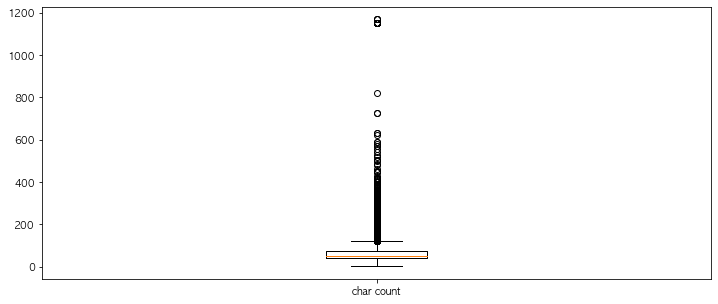

In [10]:
plt.figure(figsize=(12, 5))
plt.boxplot(train_length, labels=['char count'])

In [11]:
train_word_counts = train_set.apply(lambda x: len(x.split(" ")))

Text(0.5, 1.0, '# of words in questions')

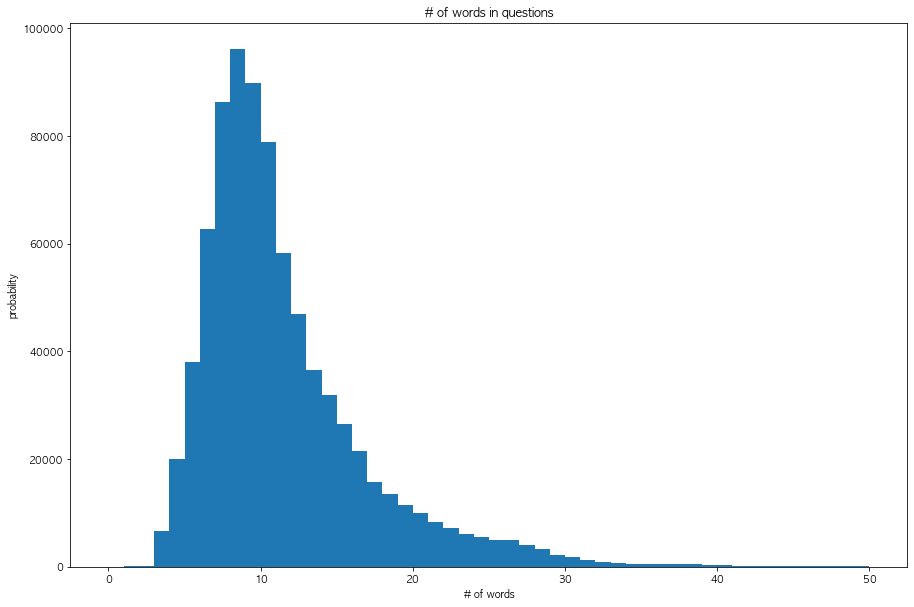

In [12]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, range=[0, 50])
plt.xlabel('# of words')
plt.ylabel('probability')
plt.title('# of words in questions')

In [13]:
print('중복 최대 개수: %d' % np.max(train_word_counts))
print('중복 최소 개수: %d' % np.min(train_word_counts))
print('평균: %f' % np.mean(train_word_counts))
print('표준편차: %f' % np.std(train_word_counts))
print('중간값: %d' % np.median(train_word_counts))
print('1사분면: %f' % np.percentile(train_word_counts, 25))
print('3사분면: %f' % np.percentile(train_word_counts, 75))

중복 최대 개수: 237
중복 최소 개수: 1
평균: 11.064856
표준편차: 5.889164
중간값: 10
1사분면: 7.000000
3사분면: 13.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x12833b690>,
 'caps': [<matplotlib.lines.Line2D at 0x12832d990>,
 'boxes': [<matplotlib.lines.Line2D at 0x12879da10>],
 'medians': [<matplotlib.lines.Line2D at 0x12833ce50>],
 'fliers': [<matplotlib.lines.Line2D at 0x129f8f210>],
 'means': []}

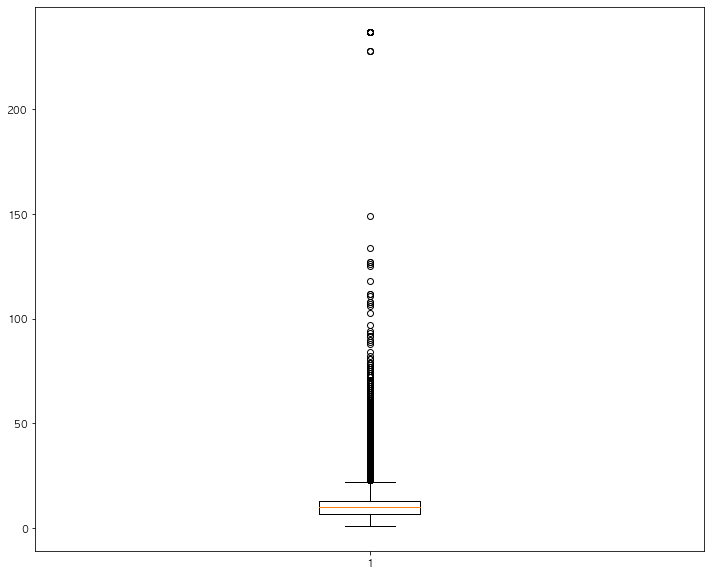

In [14]:
plt.figure(figsize=(12, 10))
plt.boxplot(train_word_counts)

In [15]:
qmarks = np.mean(train_set.apply(lambda x: '?' in x))
math = np.mean(train_set.apply(lambda x: '[math]' in x))
fullstop = np.mean(train_set.apply(lambda x: '.' in x))
capital_first = np.mean(train_set.apply(lambda x: x[0].isupper()))
capital = np.mean(train_set.apply(lambda x: max([y.isupper() for y in x])))
numbers = np.mean(train_set.apply(lambda x: max([y.isdigit() for y in x])))

In [16]:
print('물음표: {:f}%'.format(qmarks*100))
print("수식: {:f}%".format(math*100))
print("온점: {:f}%".format(fullstop*100))
print("대문자 시작: {:f}%".format(capital_first*100))
print("대문자 유무: {:f}%".format(capital*100))
print("숫자 유무: {:f}%".format(numbers*100))

물음표: 99.873853%
수식: 0.117366%
온점: 6.308219%
대문자 시작: 99.813253%
대문자 유무: 99.950531%
숫자 유무: 11.827154%


## 데이터 전처리

In [17]:
import pandas as pd
import numpy as np
import re
import json

from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [18]:
data_in = './data_in/'
filters = "([~.,!?\"':;])"
max_sequence_length = 31

change_filter = re.compile(filters)

In [19]:
train_data = pd.read_csv(data_in+'train.csv', encoding='utf-8')
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


### 비율 맞추기

In [20]:
train_pos_data = train_data.loc[train_data['is_duplicate']==1]
train_neg_data = train_data.loc[train_data['is_duplicate']==0]

class_difference = len(train_neg_data) - len(train_pos_data)
sample_frac = 1 - (class_difference / len(train_neg_data))

In [21]:
train_neg_data= train_neg_data.sample(frac=sample_frac)

In [22]:
print(len(train_pos_data))
print(len(train_neg_data))

149263
149263


In [23]:
train_data = pd.concat([train_pos_data, train_neg_data])

### 문장 문자열에 대한 전처리

In [24]:
q1 = [str(s) for s in train_data['question1']]
q2 = [str(s) for s in train_data['question2']]

filtered_q1 = list()
filtered_q2 = list()

for q in q1:
    filtered_q1.append(re.sub(change_filter, "", q).lower())
    
for q in q2:
    filtered_q2.append(re.sub(change_filter, "", q).lower())

### 문자열 토크나이징

In [25]:
tokenizer = Tokenizer()

# 토크나이저 객체는 합쳐서 만들기
tokenizer.fit_on_texts(filtered_q1 + filtered_q2)

# 토크나이징은 따로 수행하기
q1_seq = tokenizer.texts_to_sequences(filtered_q1)
q2_seq = tokenizer.texts_to_sequences(filtered_q2)

In [26]:
q1_data = pad_sequences(q1_seq, maxlen=max_sequence_length, padding='post')
q2_data = pad_sequences(q2_seq, maxlen=max_sequence_length, padding='post')

In [27]:
# 라벨값과 단어 사전 저장
word_vocab = {}
word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0

labels = np.array(train_data['is_duplicate'], dtype=int)

In [28]:
data_configs = {}
data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

In [29]:
TRAIN_Q1_DATA = 'train_q1.npy'
TRAIN_Q2_DATA = 'train_q2.npy'
TRAIN_LABEL_DATA = 'train_label.npy'
DATA_CONFIGS = 'data_configs.json'

In [30]:
np.save(open(DATA_IN_PATH + TRAIN_Q1_DATA, 'wb'), q1_data)
np.save(open(DATA_IN_PATH + TRAIN_Q2_DATA , 'wb'), q2_data)
np.save(open(DATA_IN_PATH + TRAIN_LABEL_DATA , 'wb'), labels)

json.dump(data_configs, open(DATA_IN_PATH + DATA_CONFIGS, 'w'))

#### test

In [31]:
test_data = pd.read_csv(data_in+'test.csv', encoding='utf-8')
valid_ids = [type(x) == int for x in test_data.test_id]
test_data = test_data[valid_ids].drop_duplicates()

/Users/hbae/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
test_q1 = [str(s) for s in test_data['question1']]
test_q2 = [str(s) for s in test_data['question2']]

filtered_test_q1 = list()
filtered_test_q2 = list()

for q in test_q1:
    filtered_test_q1.append(re.sub(change_filter, "", q).lower())
    
for q in test_q2:
    filtered_test_q2.append(re.sub(change_filter, "", q).lower())

In [33]:
tokenizer = Tokenizer()

# 토크나이저 객체는 합쳐서 만들기
tokenizer.fit_on_texts(filtered_test_q1 + filtered_test_q2)

# 토크나이징은 따로 수행하기
test_q1_seq = tokenizer.texts_to_sequences(filtered_test_q1)
test_q2_seq = tokenizer.texts_to_sequences(filtered_test_q2)

In [34]:
test_q1_data = pad_sequences(test_q1_seq, maxlen=max_sequence_length, padding='post')
test_q2_data = pad_sequences(test_q2_seq, maxlen=max_sequence_length, padding='post')

In [35]:
test_id = np.array(test_data['test_id'])

In [36]:
TEST_Q1_DATA = 'test_q1.npy'
TEST_Q2_DATA = 'test_q2.npy'
TEST_ID_DATA = 'test_id.npy'

In [53]:
np.save(open(DATA_IN_PATH + TEST_Q1_DATA, 'wb'), q1_data)
np.save(open(DATA_IN_PATH + TEST_Q2_DATA , 'wb'), q2_data)
np.save(open(DATA_IN_PATH + TEST_ID_DATA , 'wb'), test_id)

# 모델링
## 1) XG Boost

In [38]:
import pandas as pd
import numpy as np
import os
import json
from sklearn.model_selection import train_test_split

In [39]:
train_q1_data = np.load(open(DATA_IN_PATH + TRAIN_Q1_DATA, 'rb'))
train_q2_data = np.load(open(DATA_IN_PATH + TRAIN_Q2_DATA, 'rb'))
train_labels = np.load(open(DATA_IN_PATH + TRAIN_LABEL_DATA, 'rb'))

In [40]:
train_input = np.stack((train_q1_data, train_q2_data), axis=1)

In [41]:
print(train_input.shape)

(298526, 2, 31)


In [42]:
train_input, eval_input, train_label, eval_label = train_test_split(train_input, train_labels, test_size=0.2, random_state=4242)

In [43]:
import xgboost as xgb

train_data = xgb.DMatrix(train_input.sum(axis=1), label=train_label)
eval_data = xgb.DMatrix(eval_input.sum(axis=1), label=eval_label)

data_list = [(train_data, 'train'), (eval_data, 'valid')]

In [44]:
# 학습을 위한 선택 옵션들은 딕셔너리를 만들어 넣으면 된다.
params = {}
params['objective'] = 'binary:logistic' # 모델의 목적함수
params['eval_metric'] = 'rmse' # 모델의 평가 지표

# num_boost_round: 데이터 반복 횟수(에폭)
# early_stopping_rounds: 해당 에폭 동안 에러값이 별로 줄어들지 않은 경우 학습 조기 멈춤
bst = xgb.train(params, train_data, num_boost_round = 1000, evals = data_list, early_stopping_rounds = 10)

[0]	train-rmse:0.48402	valid-rmse:0.48441
[1]	train-rmse:0.47353	valid-rmse:0.47421
[2]	train-rmse:0.46684	valid-rmse:0.46770
[3]	train-rmse:0.46203	valid-rmse:0.46316
[4]	train-rmse:0.45829	valid-rmse:0.45953
[5]	train-rmse:0.45568	valid-rmse:0.45720
[6]	train-rmse:0.45377	valid-rmse:0.45544
[7]	train-rmse:0.45206	valid-rmse:0.45382
[8]	train-rmse:0.45099	valid-rmse:0.45285
[9]	train-rmse:0.44967	valid-rmse:0.45171
[10]	train-rmse:0.44767	valid-rmse:0.44986
[11]	train-rmse:0.44660	valid-rmse:0.44897
[12]	train-rmse:0.44614	valid-rmse:0.44858
[13]	train-rmse:0.44576	valid-rmse:0.44829
[14]	train-rmse:0.44480	valid-rmse:0.44754
[15]	train-rmse:0.44444	valid-rmse:0.44727
[16]	train-rmse:0.44255	valid-rmse:0.44559
[17]	train-rmse:0.44095	valid-rmse:0.44431
[18]	train-rmse:0.44066	valid-rmse:0.44414
[19]	train-rmse:0.44019	valid-rmse:0.44366
[20]	train-rmse:0.43991	valid-rmse:0.44346
[21]	train-rmse:0.43889	valid-rmse:0.44260
[22]	train-rmse:0.43840	valid-rmse:0.44216
[23]	train-rmse:0.437

[189]	train-rmse:0.40306	valid-rmse:0.42506
[190]	train-rmse:0.40276	valid-rmse:0.42495
[191]	train-rmse:0.40236	valid-rmse:0.42475
[192]	train-rmse:0.40220	valid-rmse:0.42468
[193]	train-rmse:0.40212	valid-rmse:0.42466
[194]	train-rmse:0.40196	valid-rmse:0.42467
[195]	train-rmse:0.40195	valid-rmse:0.42467
[196]	train-rmse:0.40193	valid-rmse:0.42464
[197]	train-rmse:0.40188	valid-rmse:0.42463
[198]	train-rmse:0.40187	valid-rmse:0.42462
[199]	train-rmse:0.40183	valid-rmse:0.42464
[200]	train-rmse:0.40168	valid-rmse:0.42467
[201]	train-rmse:0.40166	valid-rmse:0.42467
[202]	train-rmse:0.40152	valid-rmse:0.42463
[203]	train-rmse:0.40148	valid-rmse:0.42463
[204]	train-rmse:0.40134	valid-rmse:0.42459
[205]	train-rmse:0.40132	valid-rmse:0.42458
[206]	train-rmse:0.40129	valid-rmse:0.42457
[207]	train-rmse:0.40118	valid-rmse:0.42455
[208]	train-rmse:0.40088	valid-rmse:0.42439
[209]	train-rmse:0.40057	valid-rmse:0.42425
[210]	train-rmse:0.40027	valid-rmse:0.42416
[211]	train-rmse:0.40004	valid-r

[376]	train-rmse:0.37830	valid-rmse:0.41991
[377]	train-rmse:0.37816	valid-rmse:0.41991
[378]	train-rmse:0.37803	valid-rmse:0.41989
[379]	train-rmse:0.37780	valid-rmse:0.41984
[380]	train-rmse:0.37779	valid-rmse:0.41984
[381]	train-rmse:0.37777	valid-rmse:0.41983
[382]	train-rmse:0.37758	valid-rmse:0.41979
[383]	train-rmse:0.37740	valid-rmse:0.41979
[384]	train-rmse:0.37727	valid-rmse:0.41977
[385]	train-rmse:0.37717	valid-rmse:0.41973
[386]	train-rmse:0.37695	valid-rmse:0.41969
[387]	train-rmse:0.37677	valid-rmse:0.41965
[388]	train-rmse:0.37662	valid-rmse:0.41965
[389]	train-rmse:0.37645	valid-rmse:0.41961
[390]	train-rmse:0.37641	valid-rmse:0.41959
[391]	train-rmse:0.37614	valid-rmse:0.41952
[392]	train-rmse:0.37588	valid-rmse:0.41950
[393]	train-rmse:0.37570	valid-rmse:0.41952
[394]	train-rmse:0.37549	valid-rmse:0.41949
[395]	train-rmse:0.37532	valid-rmse:0.41946
[396]	train-rmse:0.37518	valid-rmse:0.41941
[397]	train-rmse:0.37503	valid-rmse:0.41937
[398]	train-rmse:0.37486	valid-r

[563]	train-rmse:0.35730	valid-rmse:0.41664
[564]	train-rmse:0.35720	valid-rmse:0.41663
[565]	train-rmse:0.35701	valid-rmse:0.41659
[566]	train-rmse:0.35682	valid-rmse:0.41657
[567]	train-rmse:0.35664	valid-rmse:0.41654
[568]	train-rmse:0.35662	valid-rmse:0.41654
[569]	train-rmse:0.35660	valid-rmse:0.41653
[570]	train-rmse:0.35649	valid-rmse:0.41653
[571]	train-rmse:0.35645	valid-rmse:0.41651
[572]	train-rmse:0.35634	valid-rmse:0.41654
[573]	train-rmse:0.35616	valid-rmse:0.41649
[574]	train-rmse:0.35615	valid-rmse:0.41647
[575]	train-rmse:0.35614	valid-rmse:0.41648
[576]	train-rmse:0.35592	valid-rmse:0.41648
[577]	train-rmse:0.35579	valid-rmse:0.41649
[578]	train-rmse:0.35559	valid-rmse:0.41644
[579]	train-rmse:0.35547	valid-rmse:0.41643
[580]	train-rmse:0.35540	valid-rmse:0.41643
[581]	train-rmse:0.35530	valid-rmse:0.41642
[582]	train-rmse:0.35510	valid-rmse:0.41647
[583]	train-rmse:0.35510	valid-rmse:0.41647
[584]	train-rmse:0.35509	valid-rmse:0.41647
[585]	train-rmse:0.35507	valid-r

* 검증 진행

In [54]:
test_q1_data = np.load(open(DATA_IN_PATH + TEST_Q1_DATA, 'rb'))
test_q2_data = np.load(open(DATA_IN_PATH + TEST_Q2_DATA, 'rb'))
test_id = np.load(open(DATA_IN_PATH + TEST_ID_DATA, 'rb'))

In [55]:
test_input = np.stack((test_q1_data, test_q2_data), axis=1)
test_data = xgb.DMatrix(test_input.sum(axis=1))
test_predict = bst.predict(test_data)

In [56]:
DATA_OUT_PATH = './data_out/'
if not os.path.exists(DATA_OUT_PATH): os.makedirs(DATA_OUT_PATH)

output = pd.DataFrame({'test_id': test_id, 'is_duplicate': test_predict})
output.to_csv(DATA_OUT_PATH + 'simple_xgb.csv', index=False)

## 2) CNN 텍스트 유사도 모델
* 기준 문장과 대상 문장에 대해 인덱싱을 거쳐 문자열 형태의 문장을 인덱스 벡터 형태로 구성
* 인덱스 벡터로 구성된 문장 정보는 임베딩 과정을 통해 각 단어들이 임베딩 벡터로 바뀐 행렬로 구성
* 기준 문장과 대상 문장 각각에 해당하는 CNN 블록 거치게 함(2개의 병렬 구조)
* 두 블록을 거쳐 나온 벡터는 문장에 대한 의미 벡터가 되므로 이를 통해 유사도를 구한다.
    * FC층을 거친 후 로지스틱 회귀 방법을 통해 문장 유사도 점수 측정할 것

In [62]:
prepro_configs = json.load(open(DATA_IN_PATH + DATA_CONFIGS, 'r'))

### 모델 구현
* SentenceEmbedding 모듈: 문장에 대한 정보를 하나의 벡터로 만듬

In [58]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [59]:
class SentenceEmbedding(layers.Layer):
    def __init__(self, **kargs):
        super(SentenceEmbedding, self).__init__()
        self.conv = layers.Conv1D(kargs['conv_num_filters'], kargs['conv_window_size'], activation=tf.keras.activations.relu, padding='same')
        self.max_pool = layers.MaxPool1D(kargs['max_pool_seq_len'], 1)
        self.dense = layers.Dense(kargs['sent_embedding_dimension'], activation=tf.keras.activations.relu)
        
    def call(self, x):
        x = self.conv(x)
        x = self.max_pool(x)
        x = self.dense(x)
        
        return tf.squeeze(x, 1)

In [60]:
class SentenceSimilarityModel(tf.keras.Model):
    def __init__(self, **kargs):
        super(SentenceSimilarityModel, self).__init__(name=kargs['model_name'])
        self.word_embedding = layers.Embedding(kargs['vocab_size'], kargs['word_embedding_dimension'])
        self.base_encoder = SentenceEmbedding(**kargs)
        self.hypo_encoder = SentenceEmbedding(**kargs)
        self.dense = layers.Dense(kargs['hidden_dimension'], activation=tf.keras.activations.relu)
        self.logit = layers.Dense(1, activation=tf.keras.activations.sigmoid)
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        
    def call(self, x):
        x1, x2 = x
        b_x = self.word_embedding(x1)
        h_x = self.word_embedding(x2)
        b_x = self.dropout(b_x)
        h_x = self.dropout(h_x)
        
        b_x = self.base_encoder(b_x)
        h_x = self.hypo_encoder(h_x)
        
        e_x = tf.concat([b_x, h_x], -1)
        e_x = self.dense(e_x)
        e_x = self.dropout(e_x)
        
        return self.logit(e_x)

In [63]:
model_name = "cnn_similarity"
BATCH_SIZE = 1024
NUM_EPOCHS = 100
VALID_SPLIT = 0.1
MAX_LEN = 31

kargs = {'model_name': model_name,
         'vocab_size': prepro_configs['vocab_size'],
         'word_embedding_dimension': 100,
         'conv_num_filters': 300,
         'conv_window_size': 3,
         'max_pool_seq_len': MAX_LEN,
         'sent_embedding_dimension': 128,
         'dropout_rate': 0.2,
         'hidden_dimension': 200,
         'output_dimension':1}

In [68]:
model = SentenceSimilarityModel(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

In [69]:
# overfitting을 막기 위한 ealrystop 추가j
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=1)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)\

checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

./data_out/cnn_similarity -- Folder create complete 



In [70]:
history = model.fit((train_q1_data, train_q2_data), labels, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                   validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

Epoch 1/100
263/263 [==============================] - ETA: 0s - loss: 0.5487 - accuracy: 0.7152
Epoch 00001: val_accuracy improved from -inf to 0.69949, saving model to ./data_out/cnn_similarity/weights.h5
263/263 [==============================] - 66s 251ms/step - loss: 0.5487 - accuracy: 0.7152 - val_loss: 0.6266 - val_accuracy: 0.6995
Epoch 2/100
263/263 [==============================] - ETA: 0s - loss: 0.4453 - accuracy: 0.7916
Epoch 00002: val_accuracy did not improve from 0.69949
263/263 [==============================] - 67s 253ms/step - loss: 0.4453 - accuracy: 0.7916 - val_loss: 0.6724 - val_accuracy: 0.6562


In [72]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

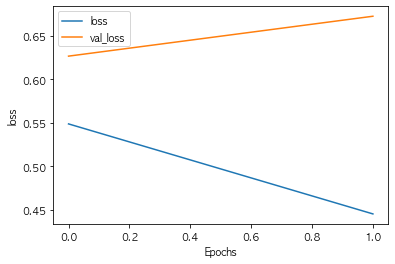

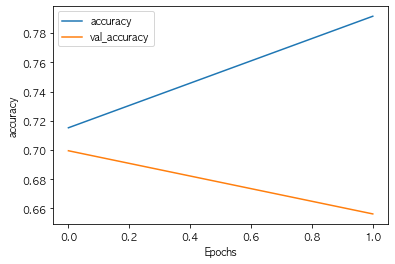

In [73]:
plot_graphs(history, 'loss')
plot_graphs(history, 'accuracy')

## 3) MaLSTM

In [75]:
class Model(tf.keras.Model):
    def __init__(self, **kargs):
        super(Model, self).__init__(name=model_name)
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'], 
                                         output_dim=kargs['embedding_dimension'])
        self.lstm = layers.LSTM(units=kargs['lstm_dimension'])
        
    def call(self, x):
        # input 튜플 형태로 들어옴
        x1, x2 = x
        x1 = self.embedding(x1)
        x2 = self.embedding(x2)
        x1 = self.lstm(x1)
        x2 = self.lstm(x2)
        
        # 두 벡터간의 멘하탄 거ㅣ는 0보다 큰 어떤 값을 가지게 됨
        # 우리에게 필요한 최종 출력값은 두 문장 사이의 유사도 값이므로 벡터 사이의 거리를 벡터 사이의 유사도로 바꿔줌
        # 거리가 멀수록 유사도 값은 작아지고, 거리가 가까울수록 유사도는 1에 가까워짐 => exp(-x) 함수 이용
        x = tf.exp(-tf.reduce_sum(tf.abs(x1 - x2), axis=1))
        
        return x

In [76]:
model_name = "malstm_similarity"
BATCH_SIZE = 128
NUM_EPOCHS = 5
VALID_SPLIT = 0.1
MAX_LEN = 31

kargs = {'vocab_size': prepro_configs['vocab_size'],
         'embedding_dimension': 100,
         'lstm_dimension':150}

In [77]:
model = Model(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
             loss=tf.keras.losses.BinaryCrossentropy(),
             metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

In [78]:
# overfitting을 막기 위한 ealrystop 추가
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=1)
# min_delta: the threshold that triggers the termination (acc should at least improve 0.0001)
# patience: no improvment epochs (patience = 1, 1번 이상 상승이 없으면 종료)\

checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create path if exists
if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))
    

cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

./data_out/malstm_similarity -- Folder create complete 



In [79]:
history = model.fit((train_q1_data, train_q2_data), labels, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS,
                   validation_split=VALID_SPLIT, callbacks=[earlystop_callback, cp_callback])

Epoch 1/5
2100/2100 [==============================] - ETA: 0s - loss: 0.5272 - accuracy: 0.7434
Epoch 00001: val_accuracy improved from -inf to 0.61572, saving model to ./data_out/malstm_similarity/weights.h5
2100/2100 [==============================] - 320s 152ms/step - loss: 0.5272 - accuracy: 0.7434 - val_loss: 0.6775 - val_accuracy: 0.6157
Epoch 2/5
2100/2100 [==============================] - ETA: 0s - loss: 0.4052 - accuracy: 0.8229
Epoch 00002: val_accuracy improved from 0.61572 to 0.68854, saving model to ./data_out/malstm_similarity/weights.h5
2100/2100 [==============================] - 316s 150ms/step - loss: 0.4052 - accuracy: 0.8229 - val_loss: 0.5787 - val_accuracy: 0.6885
Epoch 3/5
2100/2100 [==============================] - ETA: 0s - loss: 0.3553 - accuracy: 0.8510
Epoch 00003: val_accuracy improved from 0.68854 to 0.77301, saving model to ./data_out/malstm_similarity/weights.h5
2100/2100 [==============================] - 316s 150ms/step - loss: 0.3553 - accuracy: 0.

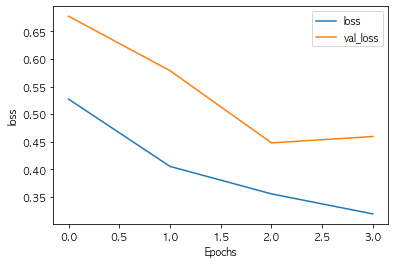

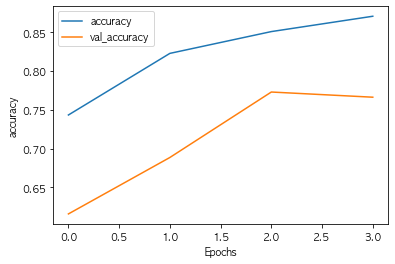

In [80]:
plot_graphs(history, 'loss')
plot_graphs(history, 'accuracy')